In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_excel('Listings.xlsx')
data.head()

,Year,Make,Model,Price,Mileage,Location,Additional,Fuel Type,Car Type,Scraping Time,Source,Car Build
0,2023,Hyundai,Tucson,39860,575,VIC,*Excl. Govt. Charges,Petrol,2.0L SUV FWD,1711775988,Drive,SUV
1,2021,Toyota,RAV4,48990,26346,NSW,*Excl. Govt. Charges,Hybrid,2.5L SUV FWD Hybrid,1711775989,Drive,SUV
2,2022,LDV,T60,34996,24444,WA,*Excl. Govt. Charges,Diesel,LUXE 2.0L Diesel Dual Cab Ute 4XD,1711775989,Drive,UTE
3,2020,Mazda,CX-3,25490,46351,NSW,*Excl. Govt. Charges,Petrol,Sport 2.0L SUV FWD,1711775992,Drive,SUV
4,2022,Hyundai,i30,55950,6700,VIC,*Excl. Govt. Charges,Petrol,2.0L Hatchback FWD,1711775992,Drive,OTHER


In [2]:
# Read the Excel file
df = pd.read_excel('MSRPs.xlsx')

# Select only the specified columns
msrp_data = df[['Year', 'Make', 'Model', 'Fuel Type', 'Car Type','MSRP']]

msrp_data.head()

,Year,Make,Model,Fuel Type,Car Type,MSRP
0,2019,Hyundai,IONIQ,Hybrid,Elite 1.6L FWD Hybrid,33990
1,2019,Hyundai,IONIQ,Electric,Premium FWD,48990
2,2019,Hyundai,Kona,Petrol,2.0L SUV FWD,23500
3,2019,Hyundai,Kona,Petrol,1.6L SUV 4WD,27000
4,2019,Hyundai,Kona,Electric,Highlander SUV FWD,64640


In [3]:
# Define the columns to check for duplicates
columns_to_check = ['Year', 'Make', 'Model', 'Price', 'Mileage', 'Location']

before_removal = len(data)

# Drop duplicates based on the specified columns
data_unique = data.drop_duplicates(subset=columns_to_check)

after_removal = len(data_unique)

removed = before_removal - after_removal

print(removed)

data_unique.head()

172


,Year,Make,Model,Price,Mileage,Location,Additional,Fuel Type,Car Type,Scraping Time,Source,Car Build
0,2023,Hyundai,Tucson,39860,575,VIC,*Excl. Govt. Charges,Petrol,2.0L SUV FWD,1711775988,Drive,SUV
1,2021,Toyota,RAV4,48990,26346,NSW,*Excl. Govt. Charges,Hybrid,2.5L SUV FWD Hybrid,1711775989,Drive,SUV
2,2022,LDV,T60,34996,24444,WA,*Excl. Govt. Charges,Diesel,LUXE 2.0L Diesel Dual Cab Ute 4XD,1711775989,Drive,UTE
3,2020,Mazda,CX-3,25490,46351,NSW,*Excl. Govt. Charges,Petrol,Sport 2.0L SUV FWD,1711775992,Drive,SUV
4,2022,Hyundai,i30,55950,6700,VIC,*Excl. Govt. Charges,Petrol,2.0L Hatchback FWD,1711775992,Drive,OTHER


In [4]:
# Perform the merge
merged_data_og = pd.merge(
    data_unique,
    msrp_data[['Year', 'Make', 'Model', 'Fuel Type', 'Car Type', 'MSRP']],
    on=['Year', 'Make', 'Model', 'Fuel Type', 'Car Type'],
    how='inner'
)

# Shuffle the DataFrame
shuffled_df = merged_data_og.sample(frac=1, random_state=1).reset_index(drop=True)

# Group by the specified columns and limit each group to 30 rows
group_columns = ['Year', 'Make', 'Model', 'Fuel Type', 'Car Type']
limited_df = shuffled_df.groupby(group_columns).head(20)

merged_data = limited_df

# Display the merged data
merged_data.head()

,Year,Make,Model,Price,Mileage,Location,Additional,Fuel Type,Car Type,Scraping Time,Source,Car Build,MSRP
0,2020,Toyota,RAV4,42725,44962,NSW,Drive Away,Hybrid,2.5L SUV 4WD Hybrid,1719026736,Drive,SUV,46290
1,2022,MG,ZS,18490,24507,QLD,Drive Away,Petrol,1.5L SUV FWD,1712976756,Drive,SUV,21990
2,2022,BMW,iX3,74990,28566,WA,*Excl. Govt. Charges,Electric,SUV RWD,1720826607,Drive,SUV,114900
3,2019,Nissan,X-TRAIL,23956,65059,SA,*Excl. Govt. Charges,Petrol,2.5L SUV FWD,1718427980,Drive,SUV,29990
4,2019,Toyota,Corolla,30890,15515,NSW,Drive Away,Hybrid,Hybrid 1.8L Hatchback FWD Hybrid,1711776584,Drive,OTHER,26335


In [5]:
import datetime

"""
# Define inflation rates per year
inflation_rates = {
    2019: 0.001,
    2020: 0.016,
    2021: 0.048,
    2022: 0.062,
    2023: 0.048,
    2024: -0.032
}

# Calculate cumulative inflation factors for each year up to 2024
cumulative_factors = {}
cumulative = 1
for year in range(2019, 2025):
    cumulative *= (1 + inflation_rates[year])
    cumulative_factors[year] = cumulative

# Adjust MSRP by cumulative inflation factors
merged_data['Adjusted MSRP'] = merged_data['Year'].apply(lambda x: merged_data['MSRP'][merged_data['Year'] == x].values[0] 
                                                   * cumulative_factors[x])
"""      

################

# Calculate the Retention Rate
merged_data['Retention Rate'] = merged_data['Price'] / merged_data['MSRP']

# Remove rows where Retention Rate is greater than 2
merged_data = merged_data[merged_data['Retention Rate'] <= 2]

# Calculate the Age of the cars
current_year = datetime.datetime.now().year
merged_data['Age'] = current_year - merged_data['Year']

merged_data = merged_data[merged_data['Age'] > 0]
merged_data = merged_data[merged_data['Mileage'] < 500000]


merged_data['Fuel Type Adjusted'] = merged_data.apply(lambda x:
                                        ('Electric' if x['Fuel Type'] == 'Electric' else
                                         ('Hybrid' if x['Fuel Type'] == 'Hybrid' else 'Conventional')),
                                        axis=1)


merged_data.head()

#merged_data.to_csv("merged_data.csv", index=False)

C:\Users\Gunne\AppData\Local\Temp\ipykernel_35156\3647118060.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['Retention Rate'] = merged_data['Price'] / merged_data['MSRP']
C:\Users\Gunne\AppData\Local\Temp\ipykernel_35156\3647118060.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['Age'] = current_year - merged_data['Year']


,Year,Make,Model,Price,Mileage,Location,Additional,Fuel Type,Car Type,Scraping Time,Source,Car Build,MSRP,Retention Rate,Age,Fuel Type Adjusted
0,2020,Toyota,RAV4,42725,44962,NSW,Drive Away,Hybrid,2.5L SUV 4WD Hybrid,1719026736,Drive,SUV,46290,0.922986,4,Hybrid
1,2022,MG,ZS,18490,24507,QLD,Drive Away,Petrol,1.5L SUV FWD,1712976756,Drive,SUV,21990,0.840837,2,Conventional
2,2022,BMW,iX3,74990,28566,WA,*Excl. Govt. Charges,Electric,SUV RWD,1720826607,Drive,SUV,114900,0.652654,2,Electric
3,2019,Nissan,X-TRAIL,23956,65059,SA,*Excl. Govt. Charges,Petrol,2.5L SUV FWD,1718427980,Drive,SUV,29990,0.798800,5,Conventional
4,2019,Toyota,Corolla,30890,15515,NSW,Drive Away,Hybrid,Hybrid 1.8L Hatchback FWD Hybrid,1711776584,Drive,OTHER,26335,1.172964,5,Hybrid


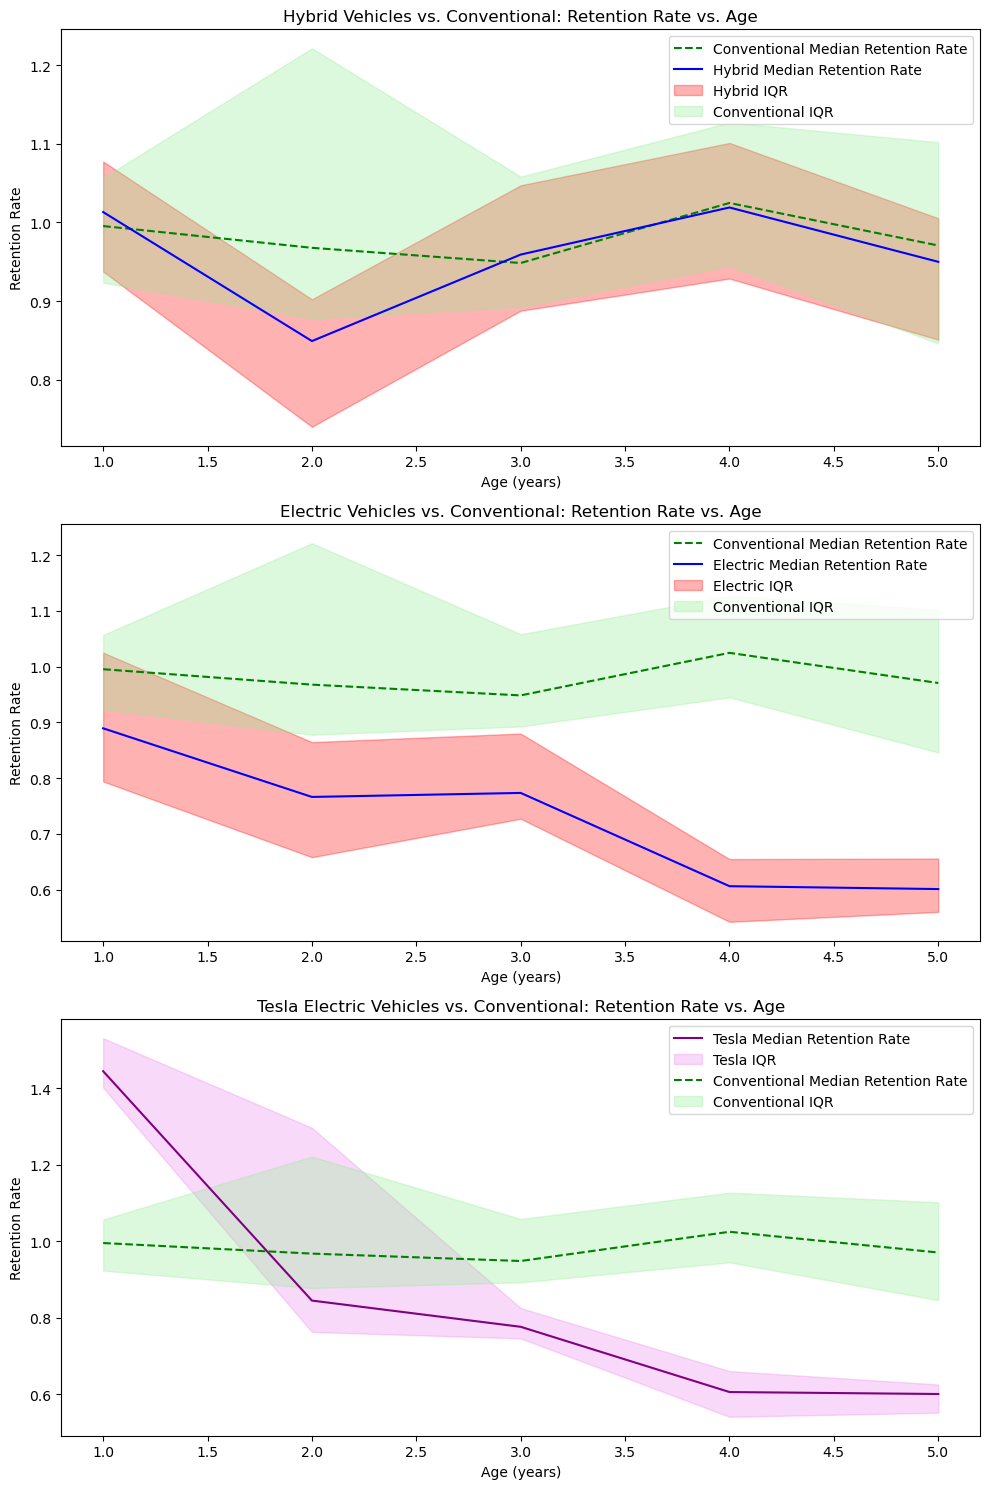

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assume 'data' is your DataFrame and it has been loaded properly.

# Filter data for Tesla electric cars
tesla_data = merged_data[(merged_data['Fuel Type Adjusted'] == 'Electric') & (merged_data['Make'] == 'Tesla')]

# Group data by 'Fuel Type Adjusted' and 'Age', then calculate the median and percentiles for each group
grouped_data = merged_data.groupby(['Fuel Type Adjusted', 'Age']).agg(
    median_retention=('Retention Rate', 'median'),
    percentile_25=('Retention Rate', lambda x: np.percentile(x, 25)),
    percentile_75=('Retention Rate', lambda x: np.percentile(x, 75))
).reset_index()

# Group data specifically for Tesla electric cars
grouped_tesla_data = tesla_data.groupby('Age').agg(
    median_retention=('Retention Rate', 'median'),
    percentile_25=('Retention Rate', lambda x: np.percentile(x, 25)),
    percentile_75=('Retention Rate', lambda x: np.percentile(x, 75))
).reset_index()

# Begin plotting the updated version
fig, axs = plt.subplots(3, 1, figsize=(10, 15))  # Added one more subplot for Tesla

# Plot each fuel type in different subplots
fuel_types = ['Hybrid', 'Electric']  # Specify which fuel types to plot separately
conventional_data = grouped_data[grouped_data['Fuel Type Adjusted'] == 'Conventional']

for index, fuel_type in enumerate(fuel_types):
    subset = grouped_data[grouped_data['Fuel Type Adjusted'] == fuel_type]
    if subset.empty:
        continue

    # Sorting the subsets by 'Age'
    subset = subset.sort_values(by='Age')
    conventional_subset = conventional_data.sort_values(by='Age')

    # Plotting the conventional data on each subplot with a specific color
    axs[index].plot(conventional_subset['Age'], conventional_subset['median_retention'], color='green', label='Conventional Median Retention Rate', linestyle='--')

    # Plotting the specific fuel type data
    axs[index].plot(subset['Age'], subset['median_retention'], color='blue', label=f'{fuel_type} Median Retention Rate')

    # Plotting the area between the 25th and 75th percentiles for each type
    axs[index].fill_between(subset['Age'], subset['percentile_25'], subset['percentile_75'], color='red', alpha=0.3, label=f'{fuel_type} IQR')
    axs[index].fill_between(conventional_subset['Age'], conventional_subset['percentile_25'], conventional_subset['percentile_75'], color='lightgreen', alpha=0.3, label='Conventional IQR')

    axs[index].set_title(f'{fuel_type} Vehicles vs. Conventional: Retention Rate vs. Age')
    axs[index].set_xlabel('Age (years)')
    axs[index].set_ylabel('Retention Rate')

    axs[index].legend()

# Plot Tesla Electric Cars with Conventional Overlay
if not grouped_tesla_data.empty:
    # Sorting Tesla and conventional subsets by 'Age'
    grouped_tesla_data = grouped_tesla_data.sort_values(by='Age')
    conventional_subset = conventional_data.sort_values(by='Age')
    
    # Plotting Tesla data
    axs[2].plot(grouped_tesla_data['Age'], grouped_tesla_data['median_retention'], color='purple', label='Tesla Median Retention Rate')
    axs[2].fill_between(grouped_tesla_data['Age'], grouped_tesla_data['percentile_25'], grouped_tesla_data['percentile_75'], color='violet', alpha=0.3, label='Tesla IQR')

    # Overlaying conventional data
    axs[2].plot(conventional_subset['Age'], conventional_subset['median_retention'], color='green', linestyle='--', label='Conventional Median Retention Rate')
    axs[2].fill_between(conventional_subset['Age'], conventional_subset['percentile_25'], conventional_subset['percentile_75'], color='lightgreen', alpha=0.3, label='Conventional IQR')

    axs[2].set_title('Tesla Electric Vehicles vs. Conventional: Retention Rate vs. Age')
    axs[2].set_xlabel('Age (years)')
    axs[2].set_ylabel('Retention Rate')

    axs[2].legend()

plt.tight_layout()
plt.show()


Conventional Linear Regression:
  Gradient: -0.0066
  Intercept: 1.0345
  R^2: 0.0034
  P-value: 9.7698e-02

Hybrid Linear Regression:
  Gradient: -0.0089
  Intercept: 1.0065
  R^2: 0.0074
  P-value: 5.1696e-02

Electric Linear Regression:
  Gradient: -0.0852
  Intercept: 1.0210
  R^2: 0.2633
  P-value: 2.1172e-42

Tesla Linear Regression:
  Gradient: -0.1996
  Intercept: 1.4523
  R^2: 0.5815
  P-value: 5.6233e-34



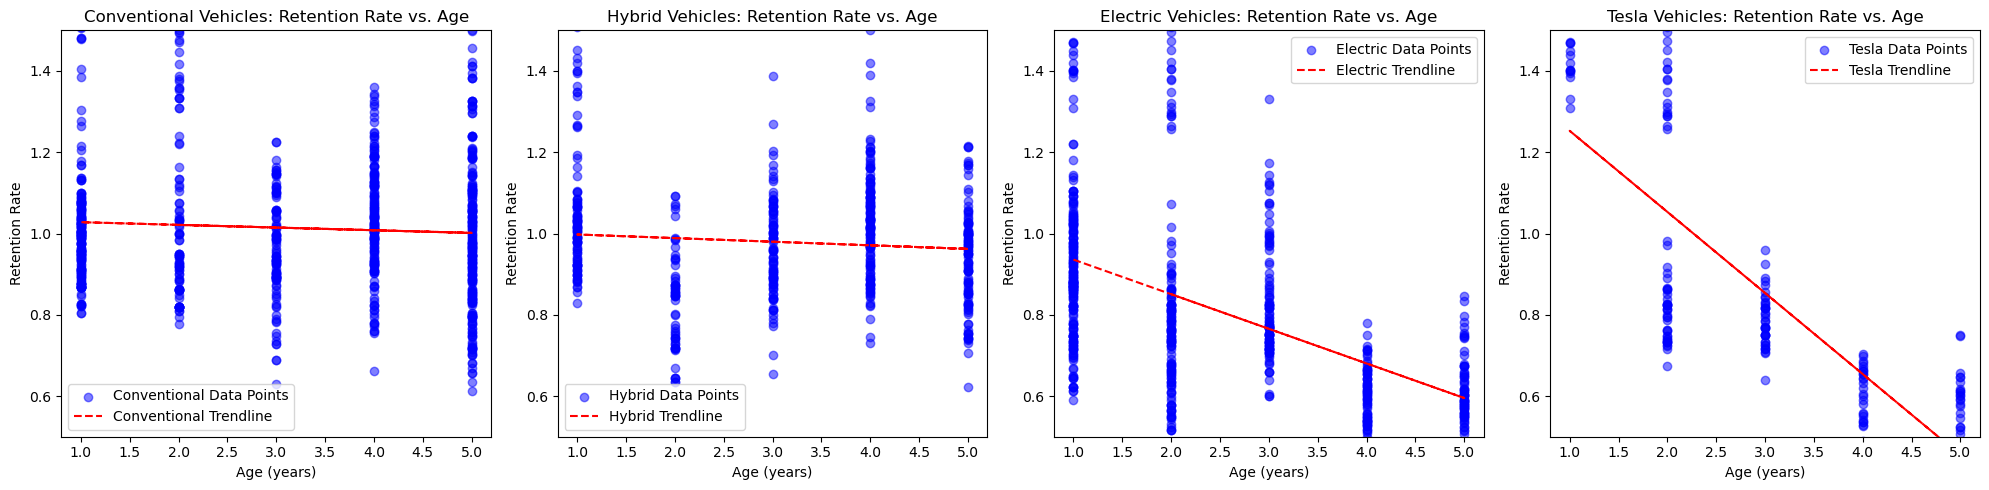

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assume 'data' is your DataFrame and it has been loaded properly.

# Filter data for Tesla electric cars
tesla_data = merged_data[(merged_data['Fuel Type Adjusted'] == 'Electric') & (merged_data['Make'] == 'Tesla')]

# Define the fuel types and filter the data accordingly
fuel_types = ['Conventional', 'Hybrid', 'Electric']
filtered_data = merged_data[merged_data['Fuel Type Adjusted'].isin(fuel_types)]

# Begin plotting the updated version
fig, axs = plt.subplots(1, 4, figsize=(20, 5))  # 1 row, 4 columns for subplots

# Function to plot scatter and trendline
def plot_scatter_with_trendline(ax, x, y, label, color):
    ax.scatter(x, y, alpha=0.5, label=f'{label} Data Points', color=color)
    
    # Calculate the linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    r_squared = r_value**2
    
    # Plot the linear regression line
    ax.plot(x, intercept + slope * x, color='red', linestyle='--', label=f'{label} Trendline')
    
    ax.set_ylim(0.5, 1.5)  # Set the y-axis range
    ax.set_title(f'{label} Vehicles: Retention Rate vs. Age')
    ax.set_xlabel('Age (years)')
    ax.set_ylabel('Retention Rate')
    ax.legend()
    
    # Print out the statistics
    print(f"{label} Linear Regression:")
    print(f"  Gradient: {slope:.4f}")
    print(f"  Intercept: {intercept:.4f}")
    print(f"  R^2: {r_squared:.4f}")
    print(f"  P-value: {p_value:.4e}\n")

# Plot each fuel type in different subplots
for index, fuel_type in enumerate(fuel_types):
    subset = filtered_data[filtered_data['Fuel Type Adjusted'] == fuel_type]

    # Plot scatter with trendline
    plot_scatter_with_trendline(axs[index], subset['Age'], subset['Retention Rate'], fuel_type, 'blue')

# Plot Tesla Electric Cars
if not tesla_data.empty:
    plot_scatter_with_trendline(axs[3], tesla_data['Age'], tesla_data['Retention Rate'], 'Tesla', 'blue')

plt.tight_layout()
plt.show()


Age 1, Conventional: Gradient = -0.0757, Intercept = 1.0354, R^2 = 0.3012, p-value = 5.0392e-16
Age 1, Hybrid: Gradient = -0.0099, Intercept = 1.0077, R^2 = 0.0037, p-value = 5.6410e-01
Age 1, Electric: Gradient = -0.1392, Intercept = 0.9494, R^2 = 0.1141, p-value = 1.8708e-06
Age 2, Conventional: Gradient = 0.0029, Intercept = 1.0500, R^2 = 0.0003, p-value = 8.5648e-01
Age 2, Hybrid: Gradient = -0.0121, Intercept = 0.8900, R^2 = 0.0798, p-value = 2.8752e-02
Age 2, Electric: Gradient = -0.0061, Intercept = 0.7437, R^2 = 0.0046, p-value = 4.6081e-01
Age 3, Conventional: Gradient = -0.0097, Intercept = 1.0210, R^2 = 0.0219, p-value = 1.2793e-01
Age 3, Hybrid: Gradient = -0.0235, Intercept = 1.0798, R^2 = 0.1985, p-value = 5.4002e-06
Age 3, Electric: Gradient = -0.0314, Intercept = 0.8733, R^2 = 0.1775, p-value = 6.1963e-06
Age 4, Conventional: Gradient = -0.0051, Intercept = 1.0699, R^2 = 0.0131, p-value = 1.3909e-01
Age 4, Hybrid: Gradient = -0.0138, Intercept = 1.0985, R^2 = 0.1015, p-

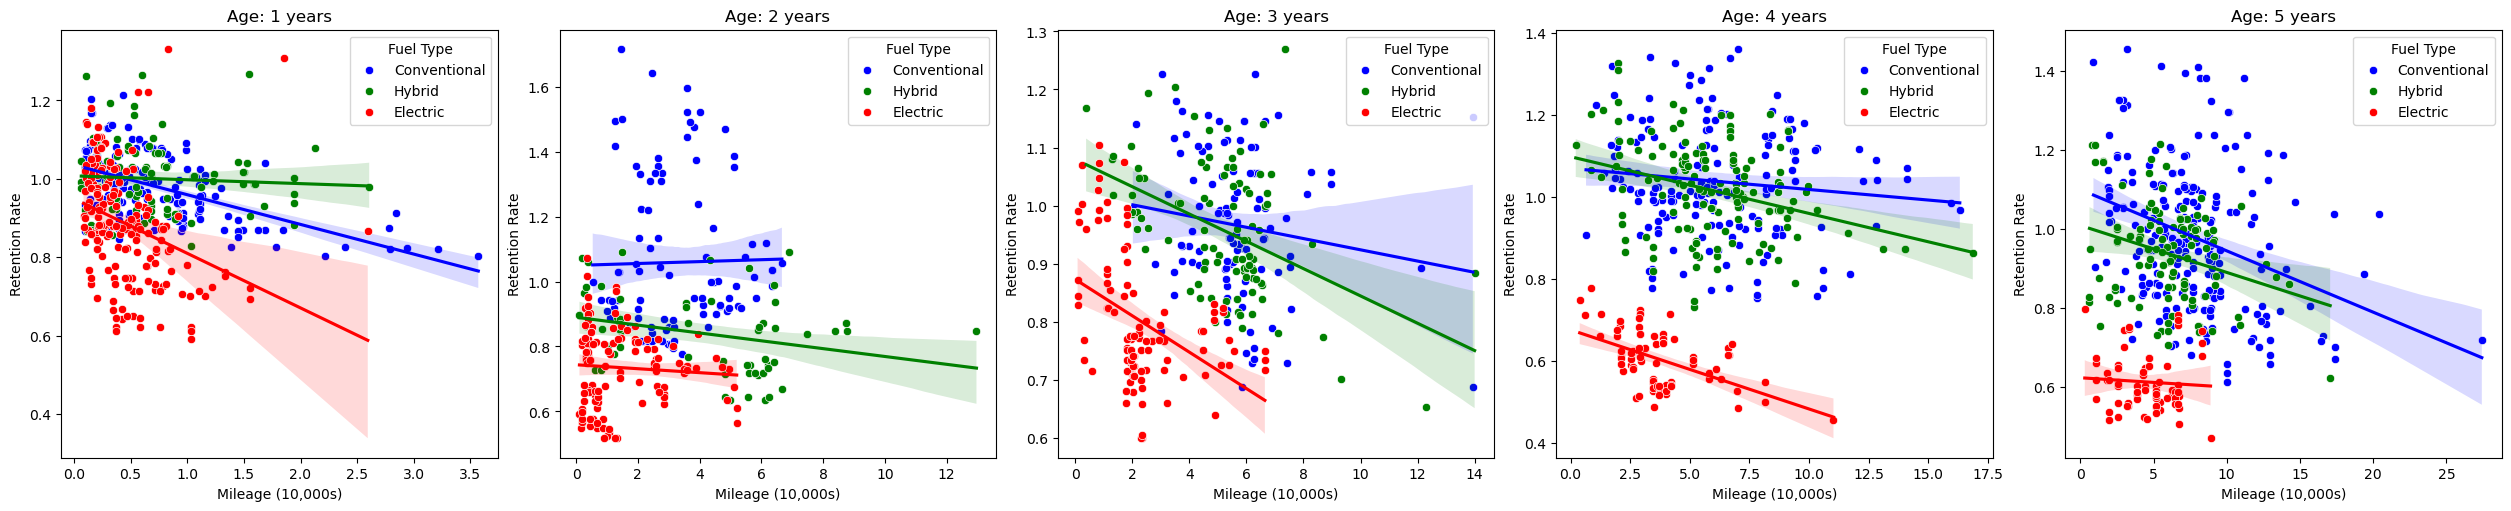

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Assuming merged_data is the result of the previous merge operation

# Get the unique ages in the dataset
unique_ages = sorted(merged_data['Age'].unique())

# Create a figure with subplots in a single row
fig, axs = plt.subplots(1, len(unique_ages), figsize=(5 * len(unique_ages), 5), constrained_layout=True)

# Ensure axs is always iterable, even if there's only one subplot
if len(unique_ages) == 1:
    axs = [axs]

# Define the fuel types
fuel_types = ['Conventional', 'Hybrid', 'Electric']

# Colors for different fuel types
colors = ['blue', 'green', 'red']

# Iterate through each age and create a plot for each fuel type
for ax, age in zip(axs, unique_ages):
    age_data = merged_data[merged_data['Age'] == age]
    for fuel_type, color in zip(fuel_types, colors):
        # Filter data for each fuel type
        fuel_data = age_data[age_data['Fuel Type Adjusted'] == fuel_type]

        # Remove outliers
        q1 = fuel_data['Retention Rate'].quantile(0.25)
        q3 = fuel_data['Retention Rate'].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        fuel_data = fuel_data[(fuel_data['Retention Rate'] >= lower_bound) & (fuel_data['Retention Rate'] <= upper_bound)]

        # Scatter plot with mileage divided by 10,000
        sns.scatterplot(data=fuel_data, x=fuel_data['Mileage'] / 10000, y='Retention Rate', ax=ax, color=color, label=fuel_type)
        # Regression line
        sns.regplot(data=fuel_data, x=fuel_data['Mileage'] / 10000, y='Retention Rate', ax=ax, color=color, scatter=False)

        # Linear regression statistics
        if len(fuel_data) > 1:  # Ensure there are enough data points
            slope, intercept, r_value, p_value, std_err = linregress(fuel_data['Mileage'] / 10000, fuel_data['Retention Rate'])
            r_squared = r_value**2
            print(f"Age {age}, {fuel_type}: Gradient = {slope:.4f}, Intercept = {intercept:.4f}, R^2 = {r_squared:.4f}, p-value = {p_value:.4e}")

    ax.set_title(f'Age: {age} years')
    ax.set_xlabel('Mileage (10,000s)')
    ax.set_ylabel('Retention Rate')
    ax.legend(title='Fuel Type')

# Display the plots
plt.show()


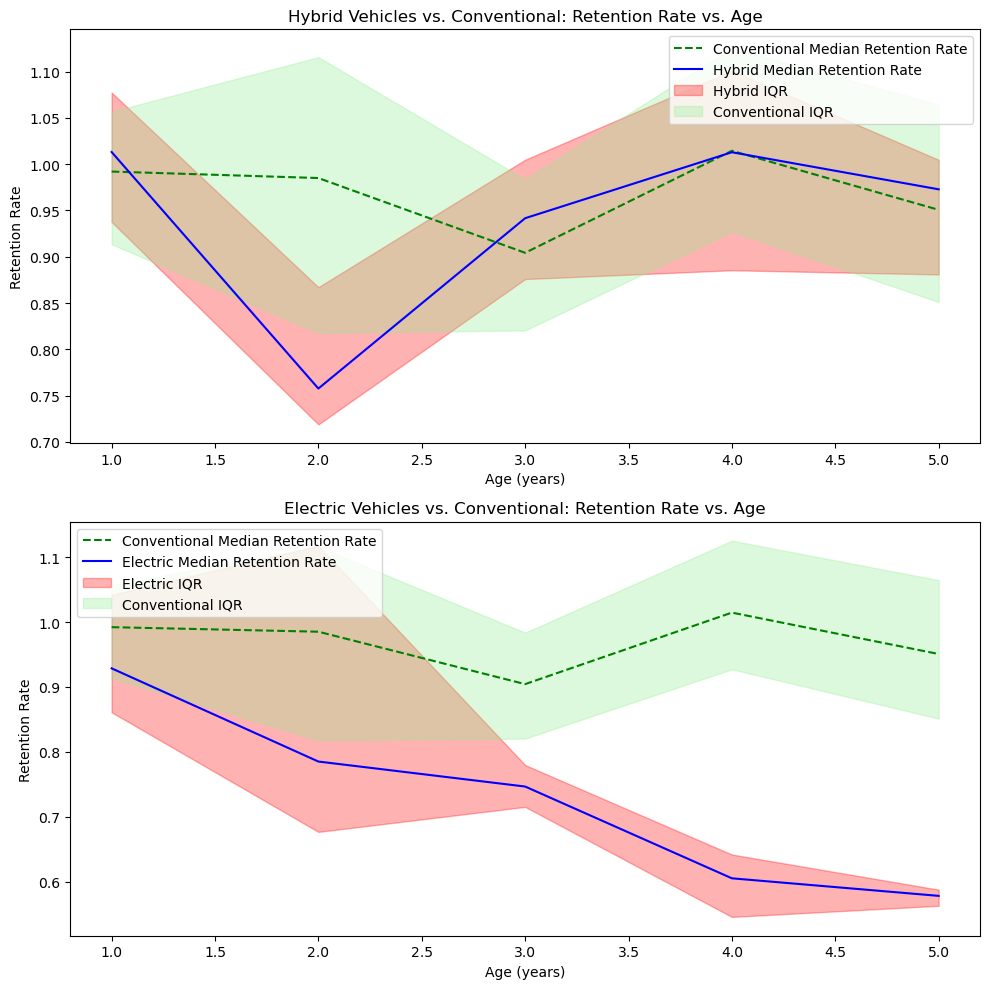

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming merged_data is the result of the previous merge operation
suv_data = merged_data[merged_data['Car Type'].str.lower().str.contains('suv')]


# Group data by 'Fuel Type Adjusted' and 'Age', then calculate the median and percentiles for each group
grouped_data = suv_data.groupby(['Fuel Type Adjusted', 'Age']).agg(
    median_retention=('Retention Rate', 'median'),
    percentile_25=('Retention Rate', lambda x: np.percentile(x, 25)),
    percentile_75=('Retention Rate', lambda x: np.percentile(x, 75))
).reset_index()

# Begin plotting the updated version
fig, axs = plt.subplots(2, 1, figsize=(10, 10))  # Reduced number of subplots

# Plot each fuel type in different subplots
fuel_types = ['Hybrid', 'Electric']  # Specify which fuel types to plot separately
conventional_data = grouped_data[grouped_data['Fuel Type Adjusted'] == 'Conventional']

for index, fuel_type in enumerate(fuel_types):
    subset = grouped_data[grouped_data['Fuel Type Adjusted'] == fuel_type]
    if subset.empty:
        continue

    # Sorting the subsets by 'Age'
    subset = subset.sort_values(by='Age')
    conventional_subset = conventional_data.sort_values(by='Age')

    # Plotting the conventional data on each subplot with a specific color
    axs[index].plot(conventional_subset['Age'], conventional_subset['median_retention'], color='green', label='Conventional Median Retention Rate', linestyle='--')

    # Plotting the specific fuel type data
    axs[index].plot(subset['Age'], subset['median_retention'], color='blue', label=f'{fuel_type} Median Retention Rate')

    # Plotting the area between the 25th and 75th percentiles for each type
    axs[index].fill_between(subset['Age'], subset['percentile_25'], subset['percentile_75'], color='red', alpha=0.3, label=f'{fuel_type} IQR')
    axs[index].fill_between(conventional_subset['Age'], conventional_subset['percentile_25'], conventional_subset['percentile_75'], color='lightgreen', alpha=0.3, label='Conventional IQR')

    axs[index].set_title(f'{fuel_type} Vehicles vs. Conventional: Retention Rate vs. Age')
    axs[index].set_xlabel('Age (years)')
    axs[index].set_ylabel('Retention Rate')

    axs[index].legend()

plt.tight_layout()
plt.show()


Conventional Linear Regression:
  Gradient: -0.0093
  Intercept: 1.0205
  R^2: 0.0091
  P-value: 3.0716e-02

Hybrid Linear Regression:
  Gradient: -0.0123
  Intercept: 1.0108
  R^2: 0.0148
  P-value: 3.1569e-02

Electric Linear Regression:
  Gradient: -0.1178
  Intercept: 1.1177
  R^2: 0.3373
  P-value: 3.0328e-31

Tesla Linear Regression:
  Gradient: -0.0624
  Intercept: 1.5188
  R^2: 0.0856
  P-value: 6.6949e-02



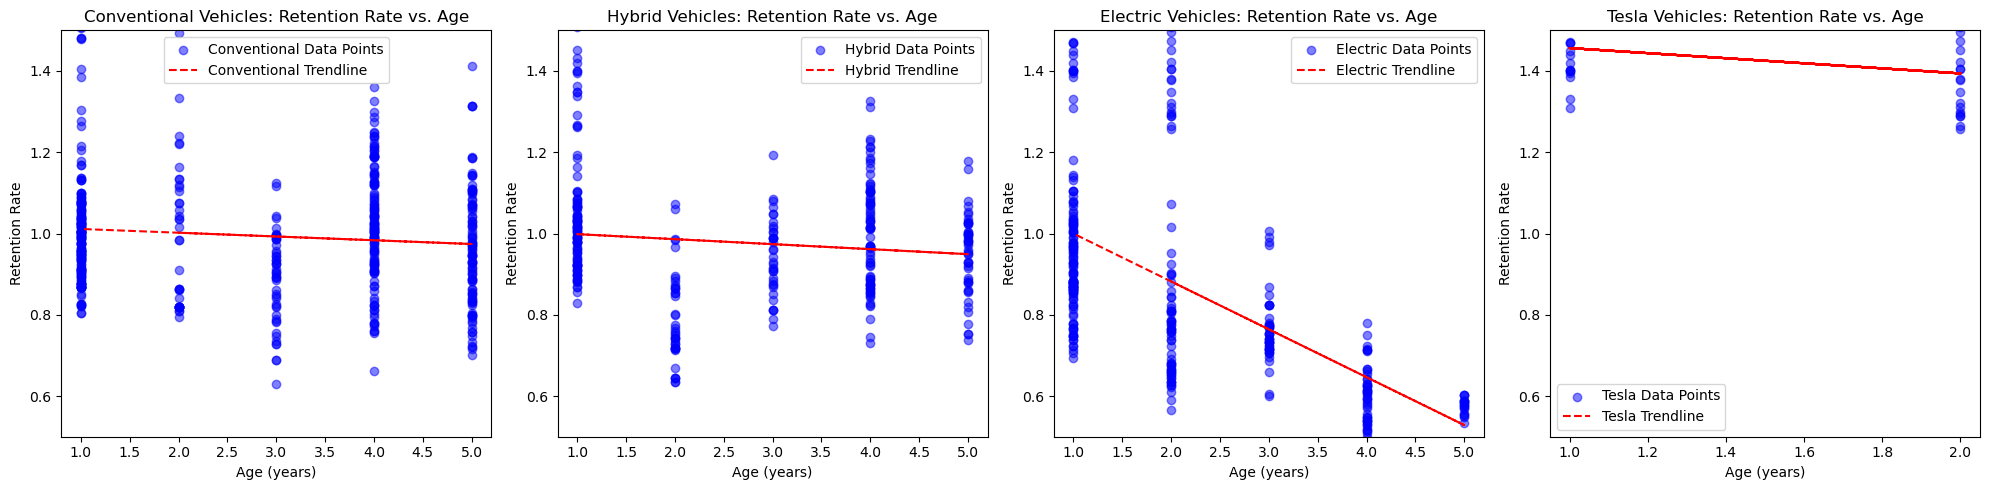

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assume 'data' is your DataFrame and it has been loaded properly.

# Filter data for Tesla electric cars
tesla_data = suv_data[(suv_data['Fuel Type Adjusted'] == 'Electric') & (suv_data['Make'] == 'Tesla')]

# Define the fuel types and filter the data accordingly
fuel_types = ['Conventional', 'Hybrid', 'Electric']
filtered_data = suv_data[suv_data['Fuel Type Adjusted'].isin(fuel_types)]

# Begin plotting the updated version
fig, axs = plt.subplots(1, 4, figsize=(20, 5))  # 1 row, 4 columns for subplots

# Function to plot scatter and trendline
def plot_scatter_with_trendline(ax, x, y, label, color):
    ax.scatter(x, y, alpha=0.5, label=f'{label} Data Points', color=color)
    
    # Calculate the linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    r_squared = r_value**2
    
    # Plot the linear regression line
    ax.plot(x, intercept + slope * x, color='red', linestyle='--', label=f'{label} Trendline')
    
    ax.set_ylim(0.5, 1.5)  # Set the y-axis range
    ax.set_title(f'{label} Vehicles: Retention Rate vs. Age')
    ax.set_xlabel('Age (years)')
    ax.set_ylabel('Retention Rate')
    ax.legend()
    
    # Print out the statistics
    print(f"{label} Linear Regression:")
    print(f"  Gradient: {slope:.4f}")
    print(f"  Intercept: {intercept:.4f}")
    print(f"  R^2: {r_squared:.4f}")
    print(f"  P-value: {p_value:.4e}\n")

# Plot each fuel type in different subplots
for index, fuel_type in enumerate(fuel_types):
    subset = filtered_data[filtered_data['Fuel Type Adjusted'] == fuel_type]

    # Plot scatter with trendline
    plot_scatter_with_trendline(axs[index], subset['Age'], subset['Retention Rate'], fuel_type, 'blue')

# Plot Tesla Electric Cars
if not tesla_data.empty:
    plot_scatter_with_trendline(axs[3], tesla_data['Age'], tesla_data['Retention Rate'], 'Tesla', 'blue')

plt.tight_layout()
plt.show()


Age 1, Conventional: Gradient = -0.0772, Intercept = 1.0367, R^2 = 0.2973, p-value = 4.2869e-15
Age 1, Hybrid: Gradient = -0.0099, Intercept = 1.0077, R^2 = 0.0037, p-value = 5.6410e-01
Age 1, Electric: Gradient = -0.1112, Intercept = 0.9635, R^2 = 0.1435, p-value = 2.1492e-05
Age 2, Conventional: Gradient = 0.0335, Intercept = 0.8718, R^2 = 0.0949, p-value = 5.6345e-02
Age 2, Hybrid: Gradient = -0.0358, Intercept = 0.9136, R^2 = 0.5983, p-value = 4.8723e-09
Age 2, Electric: Gradient = 0.0641, Intercept = 0.8235, R^2 = 0.0659, p-value = 2.1511e-02
Age 3, Conventional: Gradient = -0.0248, Intercept = 1.0305, R^2 = 0.1370, p-value = 8.1528e-03
Age 3, Hybrid: Gradient = -0.0245, Intercept = 1.0511, R^2 = 0.4265, p-value = 1.1790e-05
Age 3, Electric: Gradient = -0.0309, Intercept = 0.8073, R^2 = 0.1231, p-value = 2.6435e-02
Age 4, Conventional: Gradient = -0.0123, Intercept = 1.0921, R^2 = 0.0599, p-value = 5.0040e-03
Age 4, Hybrid: Gradient = -0.0145, Intercept = 1.0918, R^2 = 0.0973, p-v

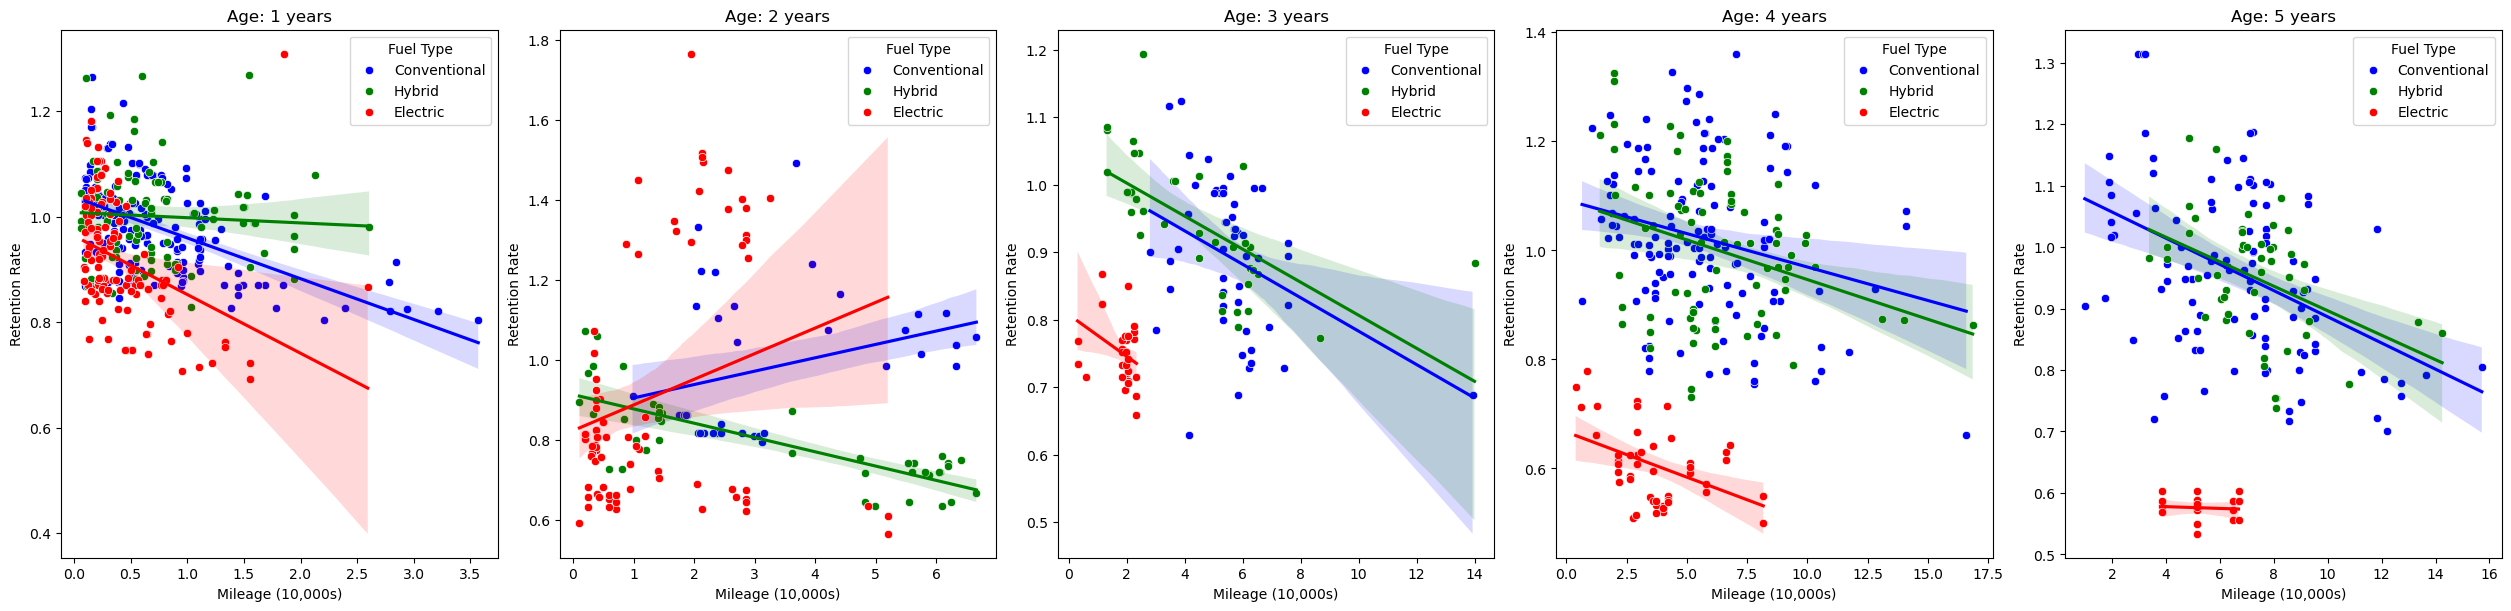

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Assuming suv_data is the result of the previous merge operation

# Get the unique ages in the dataset
unique_ages = sorted(suv_data['Age'].unique())

# Create a figure with subplots in a single horizontal row
fig, axs = plt.subplots(1, len(unique_ages), figsize=(5 * len(unique_ages), 6), constrained_layout=True)

# Ensure axs is always iterable, even if there's only one subplot
if len(unique_ages) == 1:
    axs = [axs]

# Define the fuel types
fuel_types = ['Conventional', 'Hybrid', 'Electric']

# Colors for different fuel types
colors = ['blue', 'green', 'red']

# Iterate through each age and create a plot for each fuel type
for ax, age in zip(axs, unique_ages):
    age_data = suv_data[suv_data['Age'] == age]
    for fuel_type, color in zip(fuel_types, colors):
        # Filter data for each fuel type
        fuel_data = age_data[age_data['Fuel Type Adjusted'] == fuel_type]

        # Remove outliers
        q1 = fuel_data['Retention Rate'].quantile(0.25)
        q3 = fuel_data['Retention Rate'].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        fuel_data = fuel_data[(fuel_data['Retention Rate'] >= lower_bound) & (fuel_data['Retention Rate'] <= upper_bound)]

        # Scatter plot with mileage divided by 10,000
        sns.scatterplot(data=fuel_data, x=fuel_data['Mileage'] / 10000, y='Retention Rate', ax=ax, color=color, label=fuel_type)
        # Regression line
        sns.regplot(data=fuel_data, x=fuel_data['Mileage'] / 10000, y='Retention Rate', ax=ax, color=color, scatter=False)

        # Linear regression statistics
        if len(fuel_data) > 1:  # Ensure there are enough data points
            slope, intercept, r_value, p_value, std_err = linregress(fuel_data['Mileage'] / 10000, fuel_data['Retention Rate'])
            r_squared = r_value**2
            print(f"Age {age}, {fuel_type}: Gradient = {slope:.4f}, Intercept = {intercept:.4f}, R^2 = {r_squared:.4f}, p-value = {p_value:.4e}")

    ax.set_title(f'Age: {age} years')
    ax.set_xlabel('Mileage (10,000s)')
    ax.set_ylabel('Retention Rate')
    ax.legend(title='Fuel Type')

# Display the plots
plt.show()


In [12]:
# Density distribution plots for age vs mileage
# Normalise models
# EVs are getting cheaper and cheaper, so MSRPs would are higher